In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bayes Model comparison
Model 1: Fair coin $(p = 0.5)$ <br>
Model 2: Rigged to heads $(p = 0.9)$ <br>
Model 3: Rigged to tails $(p = 0.1)$ <br>

In [2]:
# Step 1: Define the models and their prior probabilities
models = ['Fair', 'Heads_Rigged', 'Tails_Rigged']
models_p = [0.5, 0.9, 0.1]
priors = np.array([1/3, 1/3, 1/3])  # Equal prior probability for each model

# Step 2: Define the likelihoods based on the observed data
# Let's say we observed the following sequence of coin flips: H, H, T, H, H
data = ['H', 'H', 'T', 'H', 'H']
n_heads = data.count('H')
n_tails = len(data) - n_heads

# Likelihood of data given each model
likelihoods = np.array([
    models_p[0]**n_heads * (1 - models_p[0])**n_tails,      # Fair coin
    models_p[1]**n_heads * (1 - models_p[1])**n_tails,      # Rigged to heads
    models_p[2]**n_heads * (1 - models_p[2])**n_tails       # Rigged to tails
])

# Step 3: Calculate the evidence (marginal likelihood)
evidence = np.sum(likelihoods * priors)

# Step 4: Calculate the posterior probabilities using Bayes' theorem
posteriors = (likelihoods * priors) / evidence

# Display the results
for model, posterior in zip(models, posteriors):
    print(f"Posterior probability of {model}: {posterior:.4f}")


Posterior probability of Fair: 0.3223
Posterior probability of Heads_Rigged: 0.6767
Posterior probability of Tails_Rigged: 0.0009


## Bayes Update Rule
$$ \begin{align*}
P(\mathcal{M}_i|\text{data}) &= \frac{P(\text{data}|\mathcal{M}_i)P(\mathcal{M}_i)}{\sum_{j=1}^{3} P(\text{data}|\mathcal{M}_j)P(\mathcal{M}_j)} = \frac{P(\text{data}|\mathcal{M}_i)P(\mathcal{M}_i)}{P(\text{data})} \\ \\
\text{Posterior} &= \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}
\end{align*} $$

In [3]:
# Function to update beliefs after each coin toss
def update_beliefs(priors, outcome):
    # Define likelihoods based on outcome ('H' or 'T')
    if outcome == 'H':
        likelihoods = models_p # Likelihoods for [Fair, Heads_Rigged, Tails_Rigged]
    else:  # outcome == 'T'
        likelihoods = np.ones(3)-models_p  # Likelihoods for [Fair, Heads_Rigged, Tails_Rigged]
    
    # Step 1: Compute the marginal likelihood (evidence)
    evidence = np.sum(likelihoods * priors)
    
    # Step 2: Compute the posterior using Bayes' theorem
    posteriors = (likelihoods * priors) / evidence
    
    return posteriors

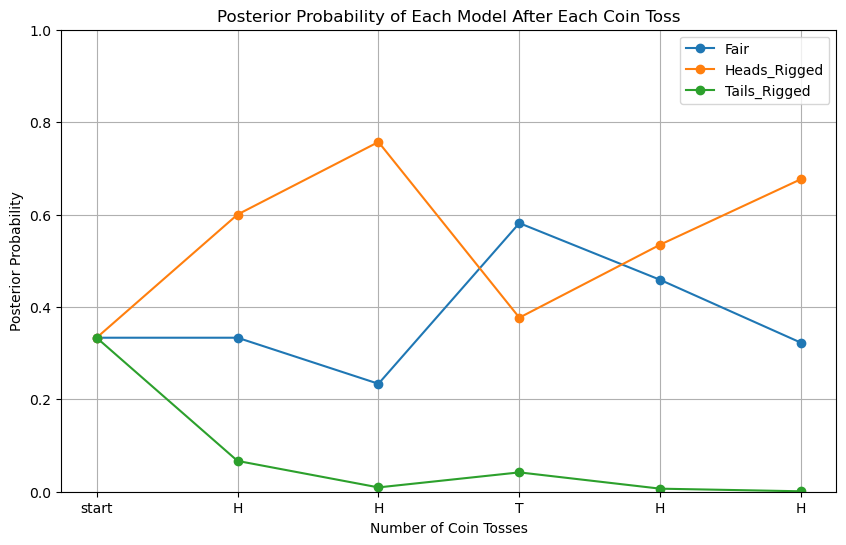

In [4]:
# Lists to store the posterior probabilities for plotting
posterior_probs = {model: [1/3] for model in models}

# Iterate through each coin toss and update beliefs sequentially
for i, toss in enumerate(data):
    priors = update_beliefs(priors, toss)  # Update priors with posteriors from the last toss
    
    # Store the updated posterior probabilities
    for model, posterior in zip(models, priors):
        posterior_probs[model].append(posterior)

# Plotting the results
plt.figure(figsize=(10, 6))
for model in models:
    plt.plot(range(0, len(data) + 1), posterior_probs[model], marker='o', label=model)

plt.xlabel('Number of Coin Tosses')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Each Model After Each Coin Toss')
plt.legend()
plt.xticks(range(0, len(data) + 1), ["start"]+data)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [5]:
# Iterate through each coin toss and update beliefs sequentially
priors = np.array([1/3, 1/3, 1/3])  # Reset the priors
for i, toss in enumerate(data):
    priors = update_beliefs(priors, toss)  # Update priors with posteriors from the last toss
    print(f"After toss {i+1} ({toss}):")
    for model, posterior in zip(models, priors):
        print(f"Posterior probability of {model}: {posterior:.4f}")
    print("")

After toss 1 (H):
Posterior probability of Fair: 0.3333
Posterior probability of Heads_Rigged: 0.6000
Posterior probability of Tails_Rigged: 0.0667

After toss 2 (H):
Posterior probability of Fair: 0.2336
Posterior probability of Heads_Rigged: 0.7570
Posterior probability of Tails_Rigged: 0.0093

After toss 3 (T):
Posterior probability of Fair: 0.5814
Posterior probability of Heads_Rigged: 0.3767
Posterior probability of Tails_Rigged: 0.0419

After toss 4 (H):
Posterior probability of Fair: 0.4585
Posterior probability of Heads_Rigged: 0.5348
Posterior probability of Tails_Rigged: 0.0066

After toss 5 (H):
Posterior probability of Fair: 0.3223
Posterior probability of Heads_Rigged: 0.6767
Posterior probability of Tails_Rigged: 0.0009



# Bayes Factor

In [6]:
# Small epsilon for numerical stability (avoid division by zero)
epsilon = 1e-10
likelihoods = np.clip(likelihoods, epsilon, 1)

# Step 1: Calculate the Bayes Factors for all pairs
n_models = len(models)
bayes_factors_matrix = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        if i != j:
            bayes_factors_matrix[i][j] = likelihoods[i] / likelihoods[j]

# Step 2: Aggregate evidence for each model (sum log of Bayes Factors for stability)
log_bayes_factors = np.log(bayes_factors_matrix + epsilon)

# Sum the log Bayes Factors across all comparisons for each model
scores = np.sum(log_bayes_factors, axis=1)

# Step 3: Determine the best-fitting model
best_model_idx = np.argmax(scores)
best_model = models[best_model_idx]

# Output the results
print("Bayes Factors Matrix (log scale):")
print(log_bayes_factors)
print("\nModel Scores (sum of log Bayes Factors):")
for model, score in zip(models, scores):
    print(f"{model}: {score:.4f}")

print(f"\nThe best-fitting model is: {best_model}")

Bayes Factors Matrix (log scale):
[[-23.02585093  -0.74170875   5.84996498]
 [  0.74170875 -23.02585093   6.59167373]
 [ -5.84996495  -6.59167366 -23.02585093]]

Model Scores (sum of log Bayes Factors):
Fair: -17.9176
Heads_Rigged: -15.6925
Tails_Rigged: -35.4675

The best-fitting model is: Heads_Rigged
